# Compare Surface Roughness

### Import Library

In [150]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import cv2
import io
import base64 
import glob
import os
import numpy as np
import matplotlib.image as img
from PIL import Image

### Loaded Image

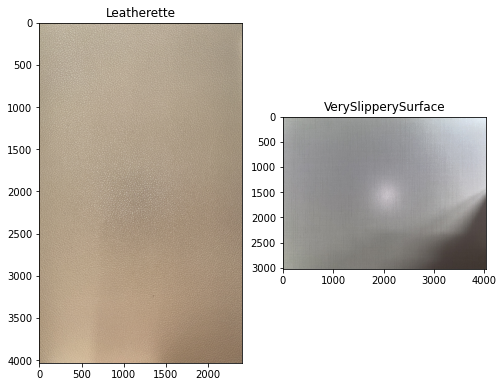

In [217]:
cwd = os.getcwd()
Leatherette_imgPath = cwd+'/DataImage/Leatherette.jpg'
VerySlipperySurface_imgPath = cwd+'/DataImage/VerySlipperySurface.JPG'

Leatherette_Img = img.imread(Leatherette_imgPath)
VerySlipperySurface_Img = img.imread(VerySlipperySurface_imgPath)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Leatherette')
plt.imshow(Leatherette_Img)

plt.subplot(1,2,2)
plt.title('VerySlipperySurface')
plt.imshow(VerySlipperySurface_Img)

plt.show()

### Convert to GrayScale using HSI

(4032, 2406)
(3024, 4032)


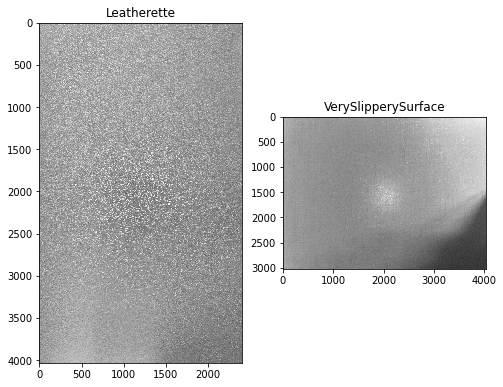

In [219]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.title('Leatherette')
Gray_Leatherette = np.zeros((Leatherette_Img.shape[0],Leatherette_Img.shape[1]))
print(Gray_Leatherette.shape)
Gray_Leatherette = Leatherette_Img[:,:,0]/3+Leatherette_Img[:,:,1]/3+Leatherette_Img[:,:,2]/3
Gray_Leatherette = Gray_Leatherette/255
plt.imshow(Gray_Leatherette, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(1,2,2)
plt.title('VerySlipperySurface')
Gray_VerySlipperySurface = np.zeros((VerySlipperySurface_Img.shape[0],VerySlipperySurface_Img.shape[1]))
print(Gray_VerySlipperySurface.shape)
Gray_VerySlipperySurface = VerySlipperySurface_Img[:,:,0]/3+VerySlipperySurface_Img[:,:,1]/3+VerySlipperySurface_Img[:,:,2]/3
Gray_VerySlipperySurface = Gray_VerySlipperySurface/255
plt.imshow(Gray_VerySlipperySurface, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.show()

### Center of Image's Surface

In [240]:
def draw_surface(title,grayscaledImg, tile_size, set_zlim):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')

    cutted_width = grayscaledImg.shape[1]//2
    cutted_height = grayscaledImg.shape[0]//2
    
    Z = grayscaledImg[cutted_height-tile_size:cutted_height+tile_size,cutted_width-tile_size:cutted_width+tile_size]

    x = np.linspace(0,Z.shape[1],Z.shape[1])
    y = np.linspace(0,Z.shape[0],Z.shape[0])
    X, Y = np.meshgrid(x,y)


    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf, shrink=0.6, aspect=15)
    ax.set_zlim(set_zlim)

    plt.title(title)
    plt.tight_layout()
    

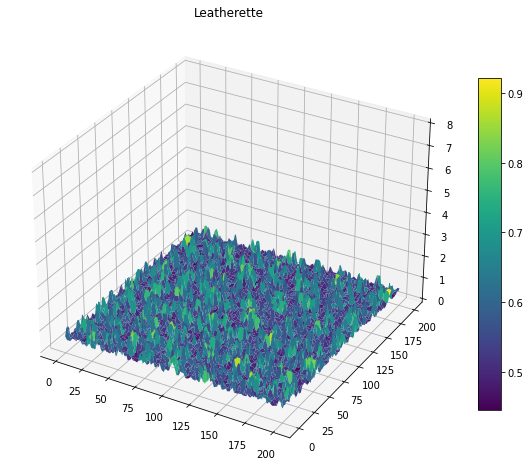

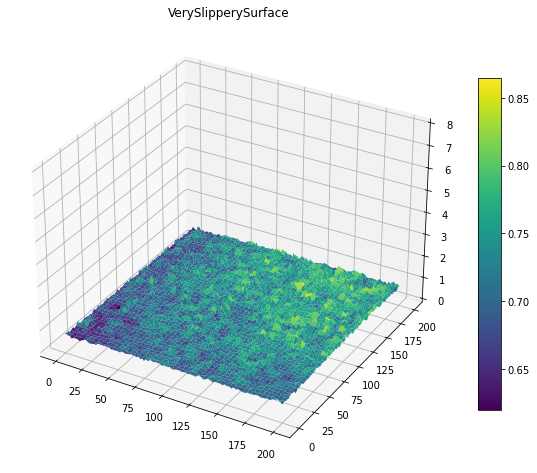

In [243]:
draw_surface('Leatherette',Gray_Leatherette,100,(0,8))
draw_surface('VerySlipperySurface',Gray_VerySlipperySurface,100,(0,8))
